In [11]:
from pycaret.utils import version
version()

'3.2.0'

In [12]:
import pandas as pd
from typing import List
from pathlib import Path
import os
from pycaret.classification import *


In [ ]:
radius=0
patient = "patient_c"

# Data Loader

In [13]:
def load_patient(patient: str) -> {}:
    data_path = Path("..","data", "mapped_data", f"{radius}" if radius else "")

    data_frames: dict = {}

    for root, dirs, files in os.walk(data_path):
        for file in files:

            if Path(file).suffix != ".csv":
                continue

            if patient not in file:
                continue

            print(file)

            data_frames[Path(file).stem] = pd.read_csv(Path(data_path, file))

    return data_frames

In [14]:
def load_files(patient_to_be_excluded: str) -> (pd.DataFrame, List):
    if not patient_to_be_excluded:
        raise ValueError("Patient to be excluded needs to be specified.")

    data_path = Path("..", "data", "mapped_data", f"{radius}" if radius else "")

    data_frames: [pd.DataFrame] = []
    loaded_files = []
    for root, dirs, files in os.walk(data_path):
        for file in files:

            if Path(file).suffix != ".csv":
                continue

            if "patient_a" in file:
                continue

            if patient_to_be_excluded in file:
                continue

            print(file)

            data_frames.append(pd.read_csv(Path(data_path, file)))
            loaded_files.append(file)

    data_frames = pd.concat(data_frames, axis=0)
    return data_frames, loaded_files

In [26]:
train_set, _ = load_files(patient)
if "CellID" in train_set.columns:
    train_set.drop(columns=["CellID"])
train_set = train_set.drop(columns=["Patient Id", "Sample Id", "MouseIgG1"])


patient_d_272840.csv
patient_d_321920.csv


In [27]:
train_set.reset_index(drop=True, inplace=True)

In [28]:
train_set.shape

(51732, 55)

# Experiment

In [29]:
test_sets: dict = load_patient(patient=patient)
test_set = list(test_sets.values())
test_set = pd.concat(test_set, axis=0)
test_set = test_set.drop(columns=["Patient Id", "Sample Id", "MouseIgG1"])
if "CellID" in test_set.columns:
    test_set.drop(columns=["CellID"])
test_set.reset_index(drop=True, inplace=True)

patient_c_272830.csv
patient_c_303148.csv


In [30]:
test_set.shape

(51740, 55)

In [31]:
experiment = setup(data=train_set, target='Treatment', index=False)

,Description,Value
0,Session id,2655
1,Target,Treatment
2,Target type,Binary
3,Target mapping,"ON: 0, PRE: 1"
4,Original data shape,"(51732, 55)"
5,Transformed data shape,"(51732, 55)"
6,Transformed train set shape,"(36212, 55)"
7,Transformed test set shape,"(15520, 55)"
8,Numeric features,54
9,Preprocess,True


In [32]:
# Perform initial model comparison.
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9996,1.0000,0.9996,0.9996,0.9996,0.9987,0.9987,0.4980
lightgbm,Light Gradient Boosting Machine,0.9996,1.0000,0.9996,0.9996,0.9996,0.9986,0.9986,1.4680
lr,Logistic Regression,0.9995,0.9996,0.9995,0.9995,0.9995,0.9982,0.9982,1.7200
rf,Random Forest Classifier,0.9995,1.0000,0.9995,0.9995,0.9995,0.9981,0.9981,3.2450
gbc,Gradient Boosting Classifier,0.9988,1.0000,0.9988,0.9988,0.9988,0.9957,0.9957,9.6400
ada,Ada Boost Classifier,0.9985,1.0000,0.9985,0.9985,0.9985,0.9946,0.9946,2.3640
dt,Decision Tree Classifier,0.9957,0.9913,0.9957,0.9957,0.9957,0.9843,0.9843,0.6730
lda,Linear Discriminant Analysis,0.9921,0.9988,0.9921,0.9921,0.9920,0.9706,0.9710,0.6190
ridge,Ridge Classifier,0.9911,0.0000,0.9911,0.9912,0.9910,0.9671,0.9675,0.0690
svm,SVM - Linear Kernel,0.9889,0.0000,0.9889,0.9893,0.9890,0.9603,0.9607,0.1200


In [33]:
# Predict on test set
predict_model(best, data=test_set)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5469,0.5305,0.5469,0.6823,0.4620,0.1219,0.2105


,41BB,B7H3,Bcl2,BetaCatenin,CCR7,CD11b,CD11c,CD127,CD14,CD19,...,SMA,STING,Syndecan1,Tbet,TCF1TCF7,TIM3,Vimentin,Treatment,prediction_label,prediction_score
0,2.311936,5.108140,1.500008,14.622630,0.973494,3.186224,2.352332,19.115992,0.366379,1.166898,...,22.299545,2.451890,0.782037,2.291144,1.674153,3.357118,48.504162,PRE,PRE,0.83
1,2.996980,2.086418,1.820174,7.536886,1.266904,2.056578,1.532237,14.289656,0.328414,1.482618,...,6.865040,2.770949,0.885557,1.691625,2.006545,3.069981,4.837349,PRE,PRE,0.85
2,3.542886,2.245878,2.059936,9.237741,1.311316,2.245390,1.666721,18.420752,0.372838,1.741999,...,6.883724,3.254838,1.048544,1.759792,2.205620,3.705031,5.656373,PRE,PRE,0.79
3,3.545680,2.247297,2.042814,10.042308,1.274353,2.229206,1.609585,17.513372,0.379877,1.753881,...,6.624147,3.319905,1.050264,1.695432,2.189340,3.547332,5.538929,PRE,PRE,0.86
4,3.498970,2.216362,1.953343,10.361200,1.238209,2.216682,1.509854,17.598043,0.390530,1.813537,...,6.450803,3.433465,0.995825,1.694404,2.135140,3.420984,6.161999,PRE,PRE,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51735,3.675264,8.148358,5.175870,18.146820,1.726708,6.562938,3.321652,18.071918,0.717464,1.899734,...,76.864830,4.857560,1.092680,1.679063,2.571024,4.698904,101.620987,ON,PRE,0.86
51736,3.620226,7.768132,5.486015,22.990576,1.621308,5.040303,3.049511,20.194162,0.736157,1.874142,...,64.777473,5.764148,1.206853,1.695425,2.554523,4.418317,101.292915,ON,PRE,0.91
51737,3.571012,7.789567,5.827306,24.418573,1.635645,4.882454,2.946889,20.509848,0.723069,1.870371,...,61.474789,5.957537,1.231754,1.674148,2.573064,4.399959,101.938499,ON,PRE,0.92
51738,3.430660,8.058144,6.814089,37.919392,1.564411,3.591321,2.435412,27.081791,0.677606,2.132802,...,105.887291,4.945165,1.321527,1.679959,2.373835,4.497453,69.650536,ON,PRE,0.94


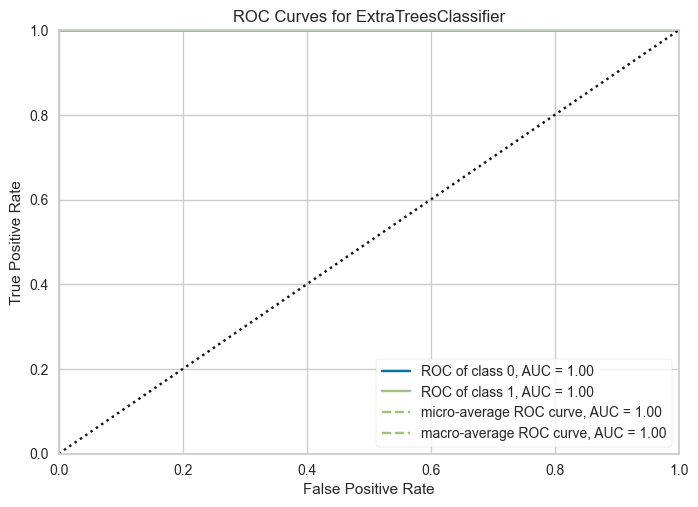

In [34]:
# Plot ROC curves for best model.
plot_model(best)

In [33]:
# Create a lightGBM model since it's very accurate and fast.
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9994,1.0000,0.9994,0.9994,0.9994,0.9980,0.9980
1,0.9983,1.0000,0.9983,0.9983,0.9983,0.9940,0.9940
2,0.9981,1.0000,0.9981,0.9981,0.9981,0.9929,0.9930
3,0.9972,0.9999,0.9972,0.9972,0.9972,0.9899,0.9899
4,0.9981,1.0000,0.9981,0.9981,0.9981,0.9929,0.9929
5,0.9972,1.0000,0.9972,0.9972,0.9972,0.9899,0.9899
6,0.9986,1.0000,0.9986,0.9986,0.9986,0.9950,0.9950
7,0.9975,0.9999,0.9975,0.9975,0.9975,0.9909,0.9909
8,0.9992,1.0000,0.9992,0.9992,0.9992,0.9970,0.9970


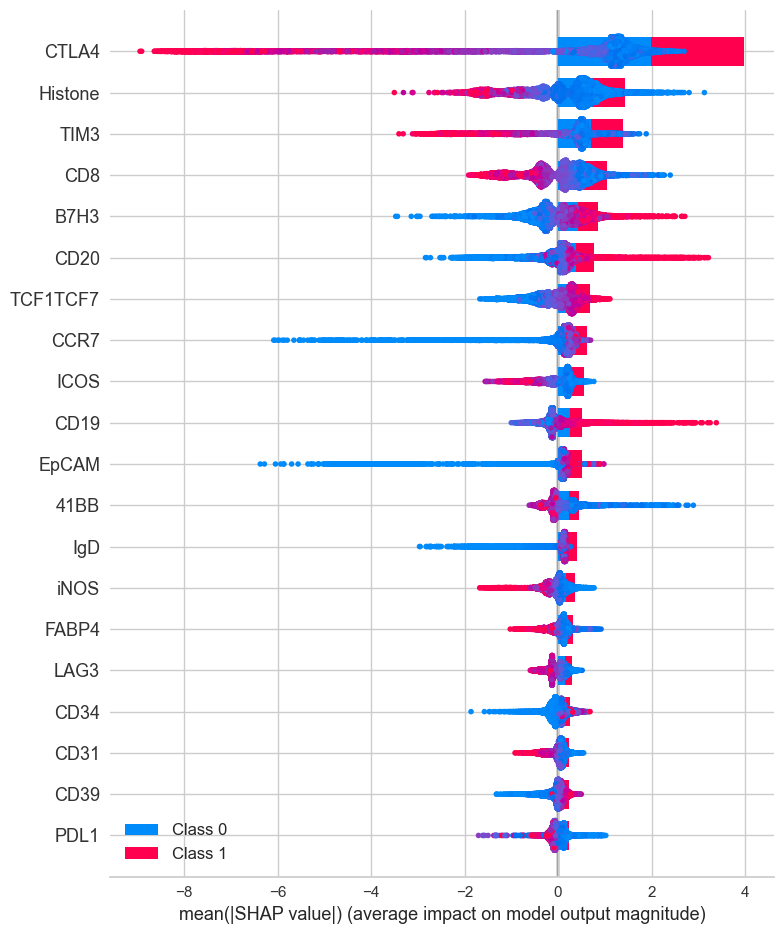

In [34]:
# Plot feature impact across classes.
interpret_model(lightgbm)

In [ ]:
# Create global SHAP plot for lightgbm.
interpret_model(lightgbm, plot='reason', observation=0)

In [ ]:
# Plot confusion matrix.
plot_model(lightgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

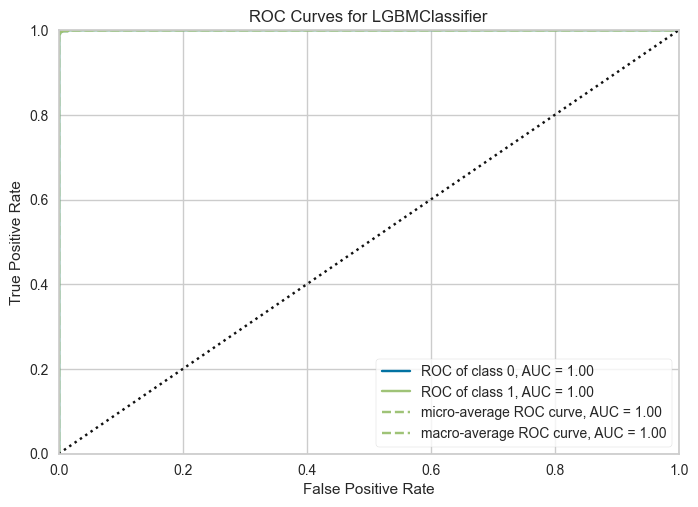

In [20]:
plot_model(lightgbm)